In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime
np.random.seed(7)
df = pd.read_csv("dataset/train.csv", sep=',', parse_dates=[2])

df = df[df['Store'] == 1.0][df['Date']>datetime.date(2013,1,6)].sort_values(by='Date')
df = df[df['DayOfWeek'] != 7]

df['SalesMinus1'] = df['Sales'].shift(1)
df['SalesMinus2'] = df['Sales'].shift(2)
df['CustomersMinus1'] = df['Customers'].shift(1)
df['CustomersMinus2'] = df['Customers'].shift(2)
df = df.dropna()
df = df.drop(['Customers', 'StateHoliday', 'Store', 'Date'], axis = 1)
df = pd.get_dummies(df, columns=['DayOfWeek'])
df.head(10)

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,Sales,Open,Promo,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
1007175,5471,1,1,1,5580.0,7176.0,654.0,785.0,0,0,1,0,0,0
1006060,4892,1,1,1,5471.0,5580.0,626.0,654.0,0,0,0,1,0,0
1004945,4881,1,1,1,4892.0,5471.0,615.0,626.0,0,0,0,0,1,0
1003830,4952,1,0,0,4881.0,4892.0,592.0,615.0,0,0,0,0,0,1
1001600,4717,1,0,0,4952.0,4881.0,646.0,592.0,1,0,0,0,0,0
1000485,3900,1,0,0,4717.0,4952.0,616.0,646.0,0,1,0,0,0,0
999370,4008,1,0,0,3900.0,4717.0,512.0,616.0,0,0,1,0,0,0
998255,4044,1,0,0,4008.0,3900.0,530.0,512.0,0,0,0,1,0,0
997140,4127,1,0,0,4044.0,4008.0,503.0,530.0,0,0,0,0,1,0
996025,5182,1,0,0,4127.0,4044.0,568.0,503.0,0,0,0,0,0,1


In [15]:
'''
Data Preperation
'''
import numpy as np
from sklearn.model_selection import train_test_split
labels = np.array(df['Sales'])
df_nosales = df.drop('Sales', axis = 1)
feature_list = list(df_nosales.columns)
np_data = np.array(df_nosales)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np_data, labels, test_size = 0.25, random_state = 42)



In [17]:
def sales_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)
estimator.fit(train_features, train_labels)

Mean Absolute Error: 579.47 degrees.
Accuracy: 88.63 %.


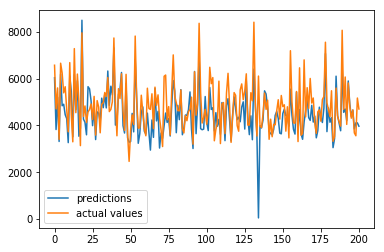

In [18]:
'''
Prediction
'''
from matplotlib import pyplot as plt

predictions = estimator.predict(test_features)
# Fix for divide by 0 problem.
test_labels[test_labels == 0] = np.mean(test_labels)
predictions[predictions == 0] = np.mean(predictions)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
plt.plot(range(0, len(predictions)), predictions, label='predictions')
plt.plot(range(0, len(test_labels)), test_labels, label='actual values')
plt.legend()

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')